## Imports

In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
from impedance.models.circuits import CustomCircuit
# from impedance.visualization import plot_nyquist # Kept if you want to switch plotting methods

## Data Loading

In [223]:
# --- Data Loading ---

def eis_z60_import(filename):
    """ Import z60 file as pandas dataframe."""
    return pd.read_csv(
        filename,
        skiprows=11,
        sep='\s+',
        header=None,
        names=["Freq", "Ampl", "Bias", "Time", "Z'", "Z''", "GD", "Err", "Range"],
        index_col="Freq")
    
try:
    EIS_10mV_1_df = eis_z60_import("Cast_Stellite1_Sample1_Actual/EIS_10mV.z60")
    EIS_10mV_2_df = eis_z60_import("Cast_Stellite1_Sample2_Actual/EIS_10mV.z60")
    EIS_10mV_3_df = eis_z60_import("Cast_Stellite1_Sample3_Actual/EIS_10mV.z60")

    EIS_20mV_1_df = eis_z60_import("Cast_Stellite1_Sample1_Actual/EIS_20mV.z60")
    EIS_20mV_2_df = eis_z60_import("Cast_Stellite1_Sample2_Actual/EIS_20mV.z60")
    EIS_20mV_3_df = eis_z60_import("Cast_Stellite1_Sample3_Actual/EIS_20mV.z60")
    
except FileNotFoundError as e:
    print(f"Error: File was not found.")
    print(e.message)
    print(e.args)
    exit()
except Exception as e:
    print(f"Error reading the CSV file: {e}")
    exit()

EIS_10mV_1_df

Ampl      Bias       Time            Z'           Z''   GD  \
Freq                                                                        
100000.000000  10.0 -0.152227    5.30156  1.079740e+01  2.284260e+00  0.0   
89038.900000   10.0 -0.152227    7.57639  1.077640e+01  1.850430e+00  0.0   
79279.300000   10.0 -0.152227    9.88210  1.078170e+01  1.183330e+00  0.0   
70589.400000   10.0 -0.152227   12.15070  1.080220e+01  7.015430e-01  0.0   
62852.000000   10.0 -0.152227   14.44200  1.084920e+01  2.390310e-01  0.0   
...             ...       ...        ...           ...           ...  ...   
0.147548       10.0 -0.152227  421.26800  1.202140e+06 -5.601180e+05  0.0   
0.131375       10.0 -0.152227  438.67600  1.610990e+06 -8.475710e+05  0.0   
0.116975       10.0 -0.152227  458.01900 -1.276680e+05 -1.894920e+06  0.0   
0.104153       10.0 -0.152227  479.57100  1.322450e+06  8.458330e+04  0.0   
0.100000       10.0 -0.152227  501.93200  1.004850e+06 -6.285010e+05  0.0   

               Err  Range  
Freq                       
100000.000000    0      0  
89038.900000     0      0  
79279.300000     0      0  
70589.400000     0      0  
62852.000000     0      0  
...            ...    ...  
0.147548         0      0  
0.131375         0      0  
0.116975         0      0  
0.104153         0      0  
0.100000         0      0  

[120 rows x 8 columns]

## Preprocessing

In [224]:
# --- Preprocessing ---
def eis_z60_preprocess(df):

    df = df.drop(columns=['Ampl', 'Bias', 'Time', 'GD', 'Err', 'Range']) # Drop columns
    mask = (df["Z'"] > 0) & (df["Z''"] < 0) # Only keep first quadrant in Nyquist plot
    df[~mask] = None
    return df

EIS_10mV_1_df = eis_z60_preprocess(EIS_10mV_1_df)
EIS_10mV_2_df = eis_z60_preprocess(EIS_10mV_2_df)
EIS_10mV_3_df = eis_z60_preprocess(EIS_10mV_3_df)

EIS_20mV_1_df = eis_z60_preprocess(EIS_20mV_1_df)
EIS_20mV_2_df = eis_z60_preprocess(EIS_20mV_2_df)
EIS_20mV_3_df = eis_z60_preprocess(EIS_20mV_3_df)

EIS_10mV_1_df

Z'       Z''
Freq                              
100000.000000        NaN       NaN
89038.900000         NaN       NaN
79279.300000         NaN       NaN
70589.400000         NaN       NaN
62852.000000         NaN       NaN
...                  ...       ...
0.147548       1202140.0 -560118.0
0.131375       1610990.0 -847571.0
0.116975             NaN       NaN
0.104153             NaN       NaN
0.100000       1004850.0 -628501.0

[120 rows x 2 columns]

## Find Impedence Amplitude and Phase


In [225]:
def eis_z60_imp_amp_phase(df):
    df['Z'] = np.sqrt( (df["Z'"].to_numpy())**2 + \
                       (df["Z'"].to_numpy())**2 )

    df['theta'] = np.arctan2(-df["Z'"].to_numpy(), df["Z''"].to_numpy()) * 180 / np.pi
    return df
    
EIS_10mV_1_df = eis_z60_imp_amp_phase(EIS_10mV_1_df)
EIS_10mV_2_df = eis_z60_imp_amp_phase(EIS_10mV_2_df)
EIS_10mV_3_df = eis_z60_imp_amp_phase(EIS_10mV_3_df)

EIS_20mV_1_df = eis_z60_imp_amp_phase(EIS_20mV_1_df)
EIS_20mV_2_df = eis_z60_imp_amp_phase(EIS_20mV_2_df)
EIS_20mV_3_df = eis_z60_imp_amp_phase(EIS_20mV_3_df)

EIS_10mV_1_df

Z'       Z''             Z       theta
Freq                                                        
100000.000000        NaN       NaN           NaN         NaN
89038.900000         NaN       NaN           NaN         NaN
79279.300000         NaN       NaN           NaN         NaN
70589.400000         NaN       NaN           NaN         NaN
62852.000000         NaN       NaN           NaN         NaN
...                  ...       ...           ...         ...
0.147548       1202140.0 -560118.0  1.700083e+06 -114.982416
0.131375       1610990.0 -847571.0  2.278284e+06 -117.749670
0.116975             NaN       NaN           NaN         NaN
0.104153             NaN       NaN           NaN         NaN
0.100000       1004850.0 -628501.0  1.421072e+06 -122.024640

[120 rows x 4 columns]

## Find average and standard deviation

In [228]:
df_10mV_concat = pd.concat((EIS_10mV_1_df, EIS_10mV_2_df, EIS_10mV_3_df))
df_10mV_means = df_10mV_concat.groupby(df_10mV_concat.index).mean()
df_10mV_err = df_10mV_concat.groupby(df_10mV_concat.index).std()

df_20mV_concat = pd.concat((EIS_20mV_1_df, EIS_20mV_2_df, EIS_20mV_3_df))
df_20mV_means = df_20mV_concat.groupby(df_20mV_concat.index).mean()
df_20mV_err = df_20mV_concat.groupby(df_20mV_concat.index).std()

In [229]:
df_10mV_means.head()

Z'            Z''             Z       theta
Freq                                                            
0.100000  561617.000000 -339202.750000  7.942464e+05 -117.441191
0.104153  374151.800000 -335554.700000  5.291305e+05 -128.224700
0.116975  586732.900000 -136540.350000  8.297656e+05 -113.064264
0.131375  825848.200000 -607456.700000  1.167926e+06 -127.817170
0.147548  673378.133333 -327485.633333  9.523005e+05 -119.913783

In [230]:
df_20mV_err.head()

Z'            Z''             Z     theta
Freq                                                         
0.100000  1.247627e+06  914047.000305  1.764411e+06  9.857596
0.104153  4.541379e+05  410368.713355  6.422480e+05  3.564236
0.116975  3.836831e+05  358439.498451  5.426099e+05  7.954958
0.131375  2.397636e+05  278657.363188  3.390769e+05  9.753189
0.147548  8.643296e+05  888082.330925  1.222347e+06  3.779877

## Plotting average data in Bode Plot

In [239]:
print(f"Theta mean error {df_err['theta'].mean()}%")
print(f"|Z| mean error {df_err['Z'].mean()}%")

Theta mean error 8.226960033482918%
|Z| mean error 160305.02735254532%


Clearly, the phase shift error is far higher than the gain, but it would be a mistake to say that gain is less reliable than the phase shift.
The error with the gain, likely due to noise at low frequencies, appears more reasonable when the data is plotted on a log axis.

[]

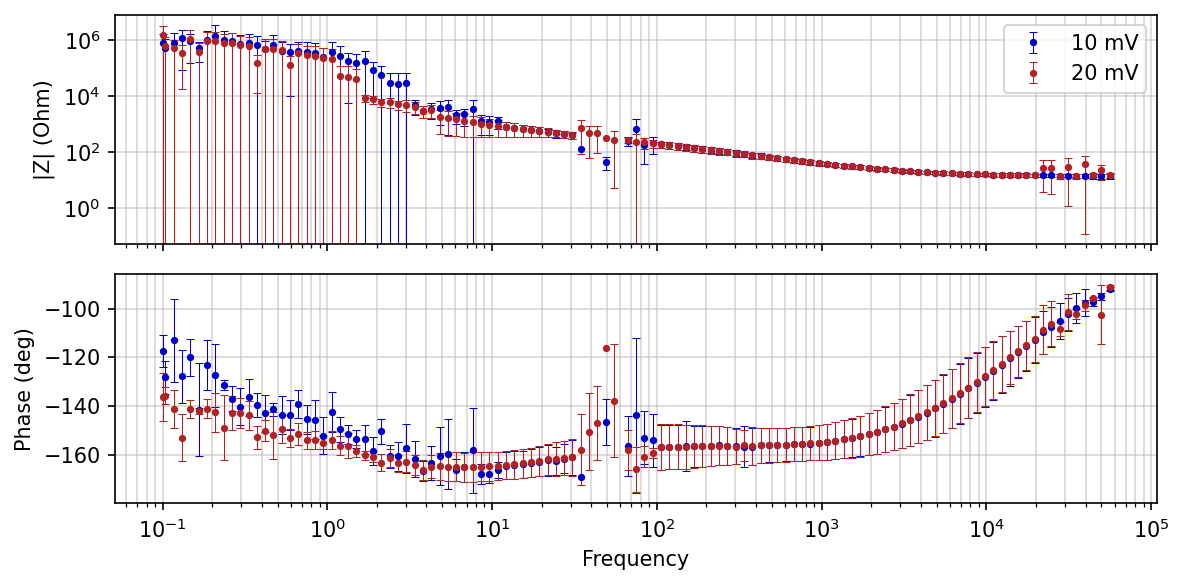

In [376]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,4), sharex=True, dpi=150)

ax1.errorbar(df_10mV_means.index.to_numpy(), df_10mV_means["Z"].to_numpy(), df_10mV_err["Z"].to_numpy(),
             fmt = '.', color='mediumblue', markersize=5, 
             ecolor="mediumblue", elinewidth=0.50, capsize=2, capthick=0.50,
             label="10 mV")
ax1.errorbar(df_20mV_means.index.to_numpy(), df_20mV_means["Z"].to_numpy(), df_20mV_err["Z"].to_numpy(),
             fmt = '.', color='firebrick', markersize=5, 
             ecolor="firebrick", elinewidth=0.50, capsize=2, capthick=0.50,
             label="20 mV")

ax2.errorbar(df_10mV_means.index.to_numpy(), df_10mV_means["theta"].to_numpy(), df_10mV_err["theta"].to_numpy(),
             fmt = '.', color='mediumblue', markersize=5, 
             ecolor="mediumblue", elinewidth=0.50, capsize=2, capthick=0.50,
             label="10 mV")
ax2.errorbar(df_20mV_means.index.to_numpy(), df_20mV_means["theta"].to_numpy(), df_20mV_err["theta"].to_numpy(),
             fmt = '.', color='firebrick', markersize=5, 
             ecolor="firebrick", elinewidth=0.50, capsize=2, capthick=0.50,
             label="20 mV")

ax1.grid(True, which="both", ls="-", alpha=0.5)
ax2.grid(True, which="both", ls="-", alpha=0.5)
ax1.legend()

#ax2.xaxis.set_major_locator(plt.MaxNLocator(11))
ax1.set_ylabel('|Z| (Ohm)')
ax2.set_ylabel('Phase (deg)')
ax2.set_xlabel("Frequency")
ax1.set_yscale("log")
ax1.set_xscale("log")
ax2.set_xscale("log")

plt.tight_layout()
plt.plot()

Okay, the errors with the impedence shift clearly show that:
- 20mV is less reliable than 10mV at high frequencies, likely due to non-linearity,
- 20mV is more reliable than 10 mV at low frequencies, or atleast, lower frequencies than 10mV

Makes me think that I need to use higher excitation voltages at low frequencies, ~although I've only seen 10mV and 20mV in research.~ this paper does 30mV! https://www.mdpi.com/2076-3417/14/13/5754

Then again, I've never seen errorbars on a Bode plot in a research paper


Source of discontinuities: https://www.gamry.com/Framework%20Help/HTML5%20-%20Tripane%20-%20Audience%20A/Content/UT/Discontinuities%20in%20EIS%20Spectra.htm


## Plotting average data on Nyquist plot

So let's have a look at how the Nyquist plot looks, with and without the sketchy data
So we'll remove everything below 10 Hz, plus remove the weird region at 50Hz

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


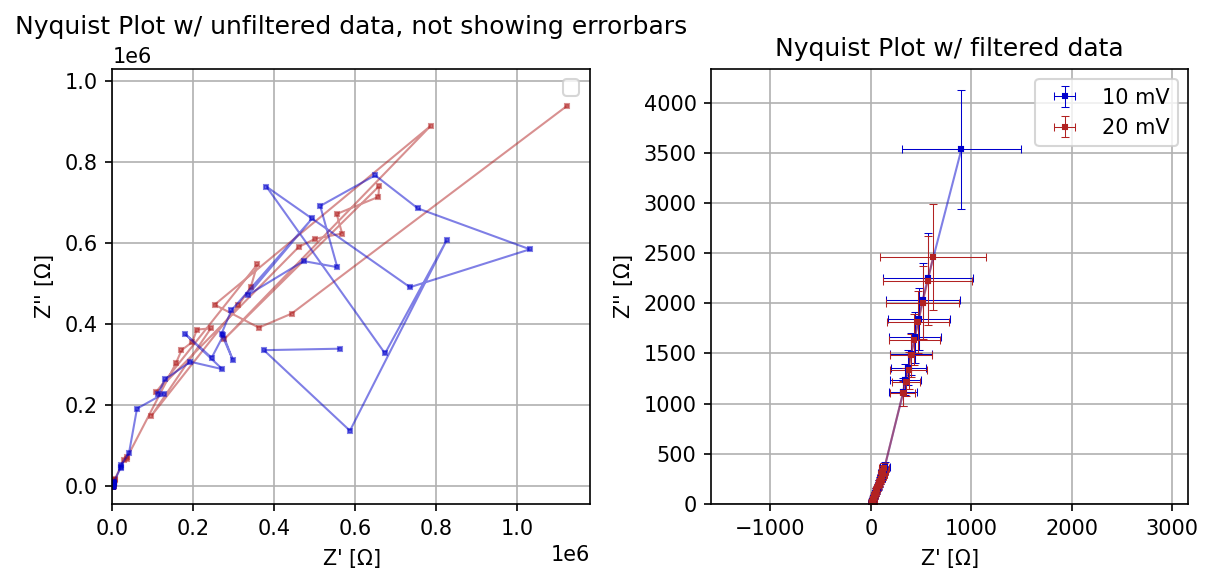

In [380]:
# Nyquist Plot

import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    fig, (ax,bx) = plt.subplots(1,2,figsize=(8, 4), dpi=150)

    #ax.errorbar(   x = df_10mV_means["Z'"].to_numpy(), y = -df_10mV_means["Z''"].to_numpy(), 
    #            xerr = df_10mV_err["Z"].to_numpy(), yerr = df_10mV_err["Z"].to_numpy(),             
    #            color='mediumblue', markersize=2, fmt = 's', ecolor="mediumblue", elinewidth=0.50, capsize=2, capthick=0.50,
    #            label="10 mV")
    #ax.errorbar(   x = df_20mV_means["Z'"].to_numpy(), y = -df_20mV_means["Z''"].to_numpy(), 
    #            xerr = df_20mV_err["Z"].to_numpy(), yerr =  df_20mV_err["Z"].to_numpy(),             
    #            color='firebrick', markersize=2, fmt = 's', ecolor="firebrick", elinewidth=0.50, capsize=2, capthick=0.50,
    #            label="20 mV")
    ax.plot(df_20mV_means["Z'"].to_numpy(), -df_20mV_means["Z''"].to_numpy(), 's-',
            linewidth=1, alpha=0.5, color='firebrick', markersize=2)
    ax.plot(df_10mV_means["Z'"].to_numpy(), -df_10mV_means["Z''"].to_numpy(), 's-',
            linewidth=1, alpha=0.5, color='mediumblue', markersize=2)

# Filtered plot
    mask = (df_10mV_means.index > 10) & ((df_10mV_means.index < 30) | (df_10mV_means.index > 100))  # Only keep those frequencies above 10 Hz
    bx.errorbar(x=(df_10mV_means[mask])["Z'"].to_numpy(), y=(-df_10mV_means[mask])["Z''"].to_numpy(), 
            xerr=(df_10mV_err[mask])["Z"].to_numpy(), yerr=(df_10mV_err[mask])["Z"].to_numpy(),             
            color='mediumblue', markersize=2, 
            fmt = 's', ecolor="mediumblue", elinewidth=0.50, capsize=2, capthick=0.50,
            label="10 mV")
    bx.errorbar(x=(df_20mV_means[mask])["Z'"].to_numpy(), y=(-df_20mV_means[mask])["Z''"].to_numpy(), 
            xerr=(df_20mV_err[mask])["Z"].to_numpy(), yerr=(df_20mV_err[mask])["Z"].to_numpy(),             
            color='firebrick', markersize=2, 
            fmt = 's', ecolor="firebrick", elinewidth=0.50, capsize=2, capthick=0.50,
            label="20 mV")
    bx.plot((df_10mV_means[mask])["Z'"].to_numpy(), (-df_10mV_means[mask])["Z''"].to_numpy(), 's-',
            linewidth=1, alpha=0.5, color='mediumblue', markersize=2)
    bx.plot((df_20mV_means[mask])["Z'"].to_numpy(), (-df_20mV_means[mask])["Z''"].to_numpy(), 's-', 
            linewidth=1, alpha=0.5, color='firebrick', markersize=2)

    ax.set_xlabel(r"Z' $[\Omega]$")
    ax.set_ylabel(r"Z'' $[\Omega]$")
    ax.set_title('Nyquist Plot w/ unfiltered data, not showing errorbars')
    ax.legend()

    bx.set_xlabel(r"Z' $[\Omega]$")
    bx.set_ylabel(r"Z'' $[\Omega]$")
    bx.set_title('Nyquist Plot w/ filtered data')
    bx.legend()

    ax.axis('equal') # Important for Nyquist plots
    ax.set_xlim(left=0)
    ax.set_ylim(bottom=0)
    ax.grid(True)

    bx.axis('equal') # Important for Nyquist plots
    bx.set_xlim(left=0)
    bx.set_ylim(bottom=0)
    bx.grid(True)

plt.tight_layout()
plt.show()

I didn't even bother plotting the errorbars on the unfiltered plot because it's just all errorbars, yeesh.
But the filtered data is actually pretty alright? Like, I can use it confidently.

So I guess I need to use higher amplitude to reach the crescent circle :)



| Circuit Element | Impedence                                    |
| --------------- | -------------------------------------------- | 
| Resistor        | $$ Z = R $$                                  |
| Capacitor       | $$ Z = \frac{1}{C \cdot j 2 \pi f} $$        |
| Inductor        | $$Z = L \cdot j 2 \pi f $$                   |
| CPE             | $$Z = \frac{1}{Q \cdot (j 2 \pi f)^\alpha}$$ |

| Impedences in parallel | Impedences in series |
| --------------- | -------------------------------------------- | 
| $$ Z_{parallel} = \frac{1}{\frac{1}{Z_1} + \frac{1}{Z_2} + ... + \frac{1}{Z_n}}$$ | $$ Z_{series} = Z_1 + Z_2 + ... + Z_n $$

In [381]:
import functools
import numpy as np

def R(f, R): return np.zeros(len(f)) + (R + 0 * 1j)
def C(f, C): return 1.0 / (C * 1j * (2 * np.pi * np.array(f)) )
def L(f, L): return L * 1j * (2 * np.pi * np.array(f))
def CPE(f, Q, alpha): return 1.0 / (Q * (1j * (2 * np.pi * np.array(f))) ** alpha)

def s(*args): return functools.reduce(np.add, [*args])
def p(*args): return np.reciprocal(functools.reduce(np.add, np.reciprocal([*args])))

f = np.linspace(1e5,1e-2,70)

# Some common-sense tests to make sure the code is correct
assert (s(R(f, 10),R(f, 10)) == R(f, 20)).all()
assert (p(R(f, 10),R(f, 10)) == R(f, 5)).all()
assert (s(C(f, 10),C(f, 10)) == C(f, 5)).all()
assert (p(C(f, 10),C(f, 10)) == C(f, 20)).all()


In [82]:
def randles_circuit(f, Rs, Rp, Q, alpha): 
    return s(R(f, Rs), p(R(f, Rp), CPE(f, Q, alpha)))

In [83]:
# Fake data

# Parameters for the simplified Randles circuit (R_s + (R_ct || C_dl))
#freq_data = np.logspace(5, -1, 60) # 10 kHz down to 0.01 Hz
R_s_true = 20.0      # Ohms
R_ct_true = 100.0    # Ohms
Q_dl_true = 1e-5     # Farads
alpha_dl_true = 0.98 # -
Z_fake = randles_circuit(freq_data, R_s_true, R_ct_true, Q_dl_true, alpha_dl_true) + \
        (0.5 + 0.5 * 1j) * np.random.normal(size=freq_data.size)
Z_fake_concat = np.concatenate([Z_exp.real,Z_exp.imag])


## Curve Fitting

Fitting is performed by non-linear least squares regression of circuit model to impedence data via the scipy.optimize.curve_fit function.

The objective function is:
$$ \chi^2 = \sum_{n=0}^{N} [Z^\prime_{exp}(\omega_n) - Z^\prime_{fit}(\omega_n)]^2 +
               [Z^{\prime\prime}_{exp}(\omega_n) - Z^{\prime\prime}_{fit}(\omega_n)]^2 $$
               

In [84]:
def model_func(f, Rs, Rp, Q, alpha):
    Z_fit = randles_circuit(f, Rs, Rp, Q, alpha)
    return np.concatenate([Z_fit.real,Z_fit.imag])

# Initial guesses for the parameters (R_s, R_ct, C_dl)
# Good initial guesses are VERY important for convergence and finding the global minimum.
initial_params_simple = [10.0, 50.0, 1e-6]

# Parameter bounds (optional, but highly recommended)
# Helps to keep parameters within physically realistic ranges.
# Format: ([lower_bounds], [upper_bounds])
bounds_simple = ([0, 0, 1e-9], [1000, 1e4, 1e-2]) # (R_s, R_ct, C_dl)

In [85]:
print("Starting curve_fit for real data...")
try:
    popt, pcov = scipy.optimize.curve_fit( 
        model_func,
        freq_data,
        np.concatenate([Z_exp.real,Z_exp.imag]),
        # Initial guesses for the parameters (R_s, R_ct, C_dl)        
        p0=[10.0, 50.0, 1e-6, 0.87], 
        # Helps to keep parameters within physically realistic ranges.        
        bounds=([0, 0, 1e-9, 0], [1000, 1e4, 1e-2, 1]), 
        maxfev=50000) # Max number of function evaluations

except RuntimeError:
    print("Curve fitting failed. Could not find optimal parameters.")
    print("Try adjusting initial guesses, bounds, or the model itself.")
except ValueError as e:
    print(f"An error occurred: {e}") 
else:
    print("curve_fit finished successfully!")

Starting curve_fit for real data...
curve_fit finished successfully!


In [86]:
# Results

perr = np.sqrt(np.diag(pcov))

print("\nOptimized Parameters:")
for name, val, err in zip(["Rs", "Rp", "Q", "alpha"], popt, perr):
    print(f"{name:<8}: {val:.4e} +- {100*(err/val):.2f}%")

Z_fit = randles_circuit(freq_data, *popt)


Optimized Parameters:
Rs      : 4.3912e+00 +- 220.09%
Rp      : 4.2998e+03 +- 40.83%
Q       : 1.9134e-05 +- 26.63%
alpha   : 7.4275e-01 +- 5.55%


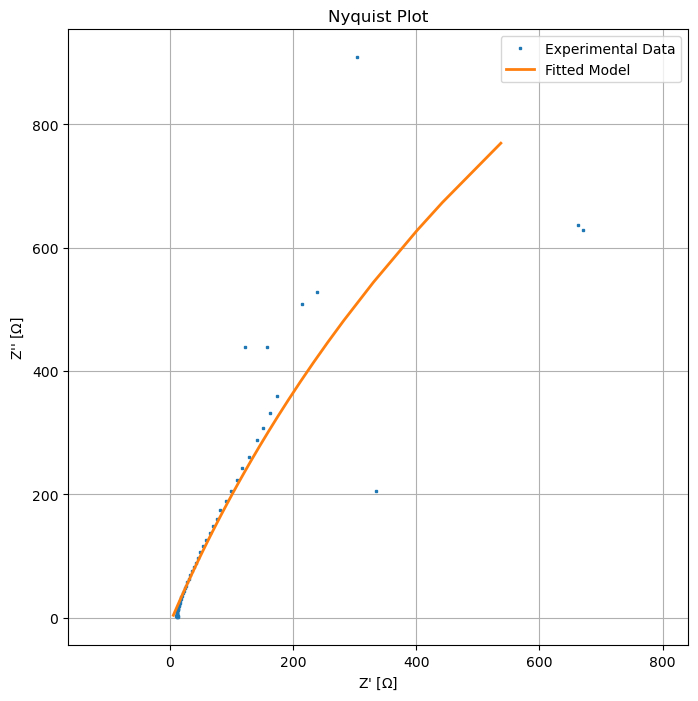

In [87]:
# Nyquist Plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(Z_exp.real, -Z_exp.imag, 's', markersize=2, label='Experimental Data')
ax.plot(Z_fit.real, -Z_fit.imag, '-', linewidth=2, label='Fitted Model')
ax.set_xlabel(r"Z' $[\Omega]$")
ax.set_ylabel(r"Z'' $[\Omega]$")
ax.set_title('Nyquist Plot')
ax.legend()

ax.set_xlim(left=0)
#ax.set_xlim(left=0,   right=popt[0]+popt[1])
#ax.set_ylim(bottom=0, top=popt[0]+popt[1])
ax.axis('equal') # Important for Nyquist plots
ax.grid(True)
plt.show()

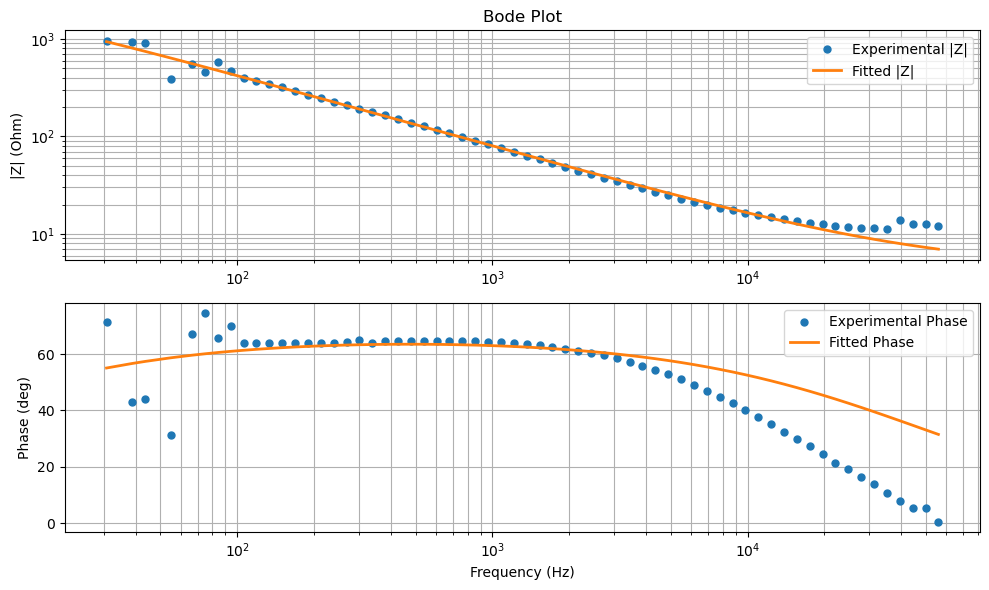

In [88]:
# Bode Plots
plt.figure(figsize=(10, 6))
    
# Magnitude
ax1 = plt.subplot(2, 1, 1)
plt.loglog(freq_data, np.sqrt(Z_exp.real**2 + Z_exp.imag**2), 
           'o', markersize=5, label='Experimental |Z|')
plt.loglog(freq_data, np.sqrt(Z_fit.real**2 + Z_fit.imag**2), 
           '-', linewidth=2, label='Fitted |Z|')
plt.ylabel('|Z| (Ohm)')
plt.legend()
plt.grid(True, which="both", ls="-")
plt.title('Bode Plot')

# Phase
ax2 = plt.subplot(2, 1, 2, sharex=ax1)
phase_exp = np.arctan2(-Z_exp.imag, Z_exp.real) * 180 / np.pi
phase_fit = np.arctan2(-Z_fit.imag, Z_fit.real) * 180 / np.pi
plt.semilogx(freq_data, phase_exp, 
             'o', markersize=5, label='Experimental Phase')
plt.semilogx(freq_data, phase_fit, 
             '-', linewidth=2, label='Fitted Phase')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (deg)')
plt.legend()
plt.grid(True, which="both", ls="-")
    
plt.tight_layout()
plt.show()
